In [405]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../DH/properatti.csv", sep = ',')
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [407]:
data1 = data.drop_duplicates(['lat', 'lon', 'price', 'description'])

In [408]:
data1.shape

(113312, 26)

In [409]:
data1['floor'].isnull().value_counts()

True     105973
False      7339
Name: floor, dtype: int64

In [410]:
data1['description']

0         2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
1         Venta de departamento en décimo piso al frente...
2         2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3         PH 3 ambientes con patio. Hay 3 deptos en lote...
4         DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
                                ...                        
121215    TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...
121216    Excelente e impecable casa en Venta en Las Lom...
121217    VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...
121218    2 Amb al contrafrente,  luminoso. El departame...
121219    Departamento de 77 m2 apto profesional. Edific...
Name: description, Length: 113312, dtype: object

In [411]:
description = data1['description'].astype(str)

In [412]:
print(data1['operation'].isnull().sum())
print(data1['property_type'].isnull().sum())

0
0


In [413]:
data1['price'].isnull().sum()/data.shape[0]

0.13450750701204423

In [344]:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
description = data['description'].astype(str)
resultado_ambientes = description.apply(lambda x: regex_ambientes.search(x))
resultado_ambientes

0         <re.Match object; span=(0, 12), match='2 AMBIE...
1                                                      None
2         <re.Match object; span=(0, 13), match='2 AMBIE...
3         <re.Match object; span=(3, 15), match='3 ambie...
4                                                      None
                                ...                        
121215                                                 None
121216                                                 None
121217    <re.Match object; span=(6, 28), match='DEPARTA...
121218                                                 None
121219                                                 None
Name: description, Length: 121220, dtype: object

In [415]:
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match.value_counts

<bound method IndexOpsMixin.value_counts of 0                   2 AMBIENTES 
1                           None
2                  2 AMBIENTES 3
3                   3 ambientes 
4                           None
                   ...          
121215                      None
121216                      None
121217    DEPARTAMENTO AMBIENTE 
121218                      None
121219                      None
Name: description, Length: 121220, dtype: object>

In [416]:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
title = data['title'].astype(str)
resultado_ambientes2 = title.apply(lambda x: regex_ambientes.search(x))
resultado_ambientes2

0            <re.Match object; span=(0, 6), match='2 AMB '>
1                                                      None
2           <re.Match object; span=(0, 7), match='2 AMB 3'>
3                                                      None
4           <re.Match object; span=(6, 12), match='2 AMB '>
                                ...                        
121215                                                 None
121216                                                 None
121217    <re.Match object; span=(6, 28), match='DEPARTA...
121218                                                 None
121219                                                 None
Name: title, Length: 121220, dtype: object

In [417]:
ambientes_match2 = resultado_ambientes2.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match2.value_counts

<bound method IndexOpsMixin.value_counts of 0                         2 AMB 
1                           None
2                        2 AMB 3
3                           None
4                         2 AMB 
                   ...          
121215                      None
121216                      None
121217    DEPARTAMENTO AMBIENTE 
121218                      None
121219                      None
Name: title, Length: 121220, dtype: object>

In [348]:
# data.dtypes

In [349]:
ambientes_match.head(10)

0               2 AMBIENTES 
1                       None
2              2 AMBIENTES 3
3               3 ambientes 
4                       None
5                       None
6                       None
7    EXCELENTE MONOAMBIENTE 
8             DOS AMBIENTES 
9                       None
Name: description, dtype: object

In [418]:
data['ambientes'] = ambientes_match
data['ambientes2'] = ambientes_match2
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'ambientes', 'ambientes2'],
      dtype='object')

In [422]:
data_ambientes = data.loc[:, 'ambientes': 'ambientes2'].astype(str)
data_ambientes

,ambientes,ambientes2
0,2 AMBIENTES,2 AMB
1,None,None
2,2 AMBIENTES 3,2 AMB 3
3,3 ambientes,None
4,None,2 AMB
...,...,...
121215,None,None
121216,None,None
121217,DEPARTAMENTO AMBIENTE,DEPARTAMENTO AMBIENTE
121218,None,None


In [423]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb = data_ambientes['ambientes'].apply(lambda x: regex_nro_ambientes.search(x))
# [('ambientes', 'ambientes2')]
nro_amb_match = resultado_nro_amb.apply(lambda x: x if x is None else x.group('nro_ambientes'))

nro_amb_match 

0            2
1         None
2            2
3            3
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: ambientes, Length: 121220, dtype: object

In [424]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb2 = data_ambientes['ambientes2'].apply(lambda x: regex_nro_ambientes.search(x))

nro_amb_match2 = resultado_nro_amb2.apply(lambda x: x if x is None else x.group('nro_ambientes'))

type(nro_amb_match2)
nro_amb_match2

0            2
1         None
2            2
3         None
4            2
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: ambientes2, Length: 121220, dtype: object

In [425]:
df_amb = pd.DataFrame([nro_amb_match, nro_amb_match2])
df_ambientes = df_amb.T
df_ambientes

,ambientes,ambientes2
0,2,2
1,None,None
2,2,2
3,3,None
4,None,2
...,...,...
121215,None,None
121216,None,None
121217,None,None
121218,None,None


In [377]:
df_ambientes['Amb'] = df_ambientes['ambientes'].astype(str) + df_ambientes['ambientes2'].astype(str)
df_ambientes['Amb']

0               22
1         NoneNone
2               22
3            3None
4            None2
            ...   
121215    NoneNone
121216    NoneNone
121217    NoneNone
121218    NoneNone
121219    NoneNone
Name: Amb, Length: 121220, dtype: object

In [382]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb3 = df_ambientes['Amb'].apply(lambda x: regex_nro_ambientes.search(x))

nro_amb_match3 = resultado_nro_amb3.apply(lambda x: x if x is None else x.group('nro_ambientes'))

type(nro_amb_match3)
print(nro_amb_match3)
nro_amb_match3.notnull().value_counts()

0            2
1         None
2            2
3            3
4            2
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: Amb, Length: 121220, dtype: object


False    86422
True     34798
Name: Amb, dtype: int64


Dormitorios


In [351]:
pattern_dormitorios = "(?P<dormitorios>\w+?\s(dormitorio|Dormitorio|dormitorios|Dormitorios|DORMITORIO|DORMITORIOS)\s\d?)"
regex_dormitorios = re.compile(pattern_dormitorios)
description = data['description'].astype(str)
resultado_dormitorios = description.apply(lambda x: regex_dormitorios.search(x))
resultado_dormitorios

0                                                      None
1         <re.Match object; span=(234, 253), match='Segu...
2         <re.Match object; span=(95, 108), match='Y DOR...
3                                                      None
4                                                      None
                                ...                        
121215    <re.Match object; span=(155, 169), match='2 do...
121216    <re.Match object; span=(453, 468), match='3 Do...
121217                                                 None
121218                                                 None
121219                                                 None
Name: description, Length: 121220, dtype: object

In [352]:
dormitorios_match = resultado_dormitorios.apply(lambda x: x if x is None else x.group('dormitorios'))
dormitorios_match.value_counts

<bound method IndexOpsMixin.value_counts of 0                        None
1         Segundo dormitorio 
2               Y DORMITORIO 
3                        None
4                        None
                 ...         
121215         2 dormitorios 
121216        3 Dormitorios 2
121217                   None
121218                   None
121219                   None
Name: description, Length: 121220, dtype: object>

In [353]:
dormitorios_match.head(12)

0                    None
1     Segundo dormitorio 
2           Y DORMITORIO 
3                    None
4                    None
5                    None
6        DOS DORMITORIOS 
7                    None
8                    None
9                    None
10                   None
11         2 Dormitorios 
Name: description, dtype: object

PILETA

In [354]:
pattern_pileta = "(?P<pileta>\s(pileta|Pileta|PILETA|piscina|Piscina|PISCINA|pisina))"
regex_pileta = re.compile(pattern_pileta, flags=re.IGNORECASE)
description = data['description'].astype(str)
resultado_pileta = description.apply(lambda x: regex_pileta.search(x))
resultado_pileta
pileta_match = resultado_pileta.apply(lambda x: x if x is None else x.group('pileta'))
pileta_match.value_counts

<bound method IndexOpsMixin.value_counts of 0            None
1            None
2            None
3            None
4            None
           ...   
121215     pileta
121216     pileta
121217       None
121218       None
121219       None
Name: description, Length: 121220, dtype: object>

In [355]:
pileta_match.head(15)
data['pileta'] = pileta_match

In [356]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,ambientes,ambientes2,pileta
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,2 AMBIENTES,2 AMB,None
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,None,None,None
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,2 AMBIENTES 3,2 AMB 3,None
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,3 ambientes,None,None
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,None,2 AMB,None


In [357]:
# mask_bv = data['place_name'] == 'Bella Vista'
# data[mask_bv]

COLUMNAS

In [358]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'ambientes', 'ambientes2', 'pileta'],
      dtype='object')

EVALUANDO NULOS

In [359]:
print(data.state_name.isnull().sum())
print((data['price'].isnull().sum())/data.shape[0])
print((data['price_aprox_usd'].isnull().sum())/data.shape[0])
print((data['rooms'].isnull().sum())/data.shape[0])
print((data['surface_total_in_m2'].isnull().sum())/data.shape[0])
print((data['surface_covered_in_m2'].isnull().sum())/data.shape[0])
print((data['price_usd_per_m2'].isnull().sum())/data.shape[0])
print((data['price_per_m2'].isnull().sum())/data.shape[0])

0
0.1683715558488698
0.1683715558488698
0.6090579112357697
0.3244349117307375
0.16422207556508828
0.43394654347467415
0.27686850354726944


In [360]:
data['price'].isnull().sum()

20410

In [361]:
data['priceClean'] = data['price']
# mask_not_USD = data['currency']!="USD"
# data.loc[mask_not_USD,'priceClean'] = data.loc[mask_not_USD,'price_aprox_usd']

# # q1 =data['priceClean'].quantile(q=0.25)
# # q1
# data['priceClean'].isnull().sum()

# Imputar price usd per m2

In [362]:
data['price_usd_per_m2_clean'] = data['price_usd_per_m2']
mask_nulos = data['price_usd_per_m2_clean'] == None
data.loc[mask_nulos, 'price_usd_per_m2_clean'] = (data.loc[mask_nulos, 'priceClean']/data.loc[mask_nulos, 'surface_covered_in_m2'] ) 
data['price_usd_per_m2_clean'].isnull().sum()/data.shape[0]

0.43394654347467415

In [363]:
mask1 = data['price_usd_per_m2_clean'].isnull()

(data.loc[mask1, 'price_usd_per_m2_clean']).isnull().sum()

data.loc[mask1, 'price_usd_per_m2_clean'] = (data.loc[mask1, 'priceClean']/data.loc[mask1, 'surface_covered_in_m2'])

data.loc[:, 'price_usd_per_m2_clean'].isnull().sum()/data.shape[0]

0.2334185777924435

In [364]:
+20410/data.shape[0]

0.1683715558488698

In [365]:
(data['priceClean']/data['surface_covered_in_m2']).isnull().sum()

33560

In [366]:
# data['price_usd_per_m2_clean'] = data['price_usd_per_m2']
# mask_nulos = (data['price_usd_per_m2_clean'] == None , data['price_usd_per_m2_clean'] == np.NaN)
# data.loc[mask_nulos, 'price_usd_per_m2_clean'] = data.loc[mask_nulos, 'price']

In [367]:
# mask_nulos = (data['price'] == np.NaN & data['price_per_m2'] != np.NaN)
# data[mask_nulos]

In [368]:
regex_price = re.compile("((US|USD|\$US|U\$D|\$) ?\d+)")
price_description_match = data['description'].apply(lambda x: x if x is np.NaN else regex_price.search(x))
price_description = price_description_match.apply(lambda x: x if x is None or x is np.NaN else x.group(0))

price_description.notnull()

0         False
1          True
2         False
3         False
4         False
          ...  
121215    False
121216    False
121217     True
121218    False
121219    False
Name: description, Length: 121220, dtype: bool

DATA PRECIOS NULOS

In [369]:
mask_price_nulos = data['price_aprox_usd'].isnull()==True
data_price_nulos = data[mask_price_nulos]
data_price_nulos_ =data_price_nulos.loc[:, ['property_type', 'place_name', 'place_with_parent_names', 'state_name', 'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'description', 'title', 'pileta' ]]
data_price_nulos_

,property_type,place_name,place_with_parent_names,state_name,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,pileta
5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,53.0,NaN,NaN,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",None
20,house,Villa Giardino,|Argentina|Córdoba|Villa Giardino|,Córdoba,148.0,148.0,NaN,"Consta de: Comedor-cocina, cuatro dormitorios ...","Casa con excelente ubicaciòn, calle asfaltada,...",None
41,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Córdoba,115.0,115.0,4.0,“Arecas” es un complejo de dúplex y departamen...,Venta en pozo deptos-dúplex- Barrio Santa Rita...,None
62,house,Berazategui,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|,Bs.As. G.B.A. Zona Sur,156.0,156.0,NaN,Casa moderna en dos plantas.PB : Living con ho...,MODERNA CASA EN OMBUES DE HUDSON,None
67,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Bs.As. G.B.A. Zona Oeste,220.0,NaN,5.0,PLANTA ALTA: DORMITORIO EN SUITE - BALCÓNPLANT...,Chalet en Venta. Ambientes. Dormitorios. 220 m2,None
...,...,...,...,...,...,...,...,...,...,...
121210,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,120.0,NaN,Dos viviendas en block en excelente ubicación ...,Casa - Martinez,None
121211,apartment,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,205.0,205.0,NaN,Excelente departamento de categoría con vistas...,Departamento - Acassuso,pileta
121212,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,420.0,420.0,NaN,ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE...,Casa - Acassuso,pileta
121213,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,600.0,600.0,NaN,EXCELENTE casa en Martinez. Inmejorable ubicai...,Casa - Martinez,pileta


In [370]:
data_price_nulos_.groupby(['state_name', 'place_name', 'property_type'])['surface_total_in_m2'].mean()

state_name                place_name                property_type
Bs.As. G.B.A. Zona Norte  Acassuso                  apartment         172.500000
                                                    house             368.750000
                          Albanueva Barrio Cerrado  apartment         154.500000
                          Altos del Pilar           house             370.000000
                          Bahía del Sol             house                    NaN
                                                                        ...     
Tucumán                   Tucumán                   store            1000.000000
                          Villa Belgrano            apartment         200.000000
                          Yerba Buena               apartment          90.417910
                                                    house             343.388889
                                                    store             105.000000
Name: surface_total_in_m2, Length: 1087, dt

In [385]:
# data['rooms_2'] = x.apply(lambda x: x.data['rooms'] if x.data['rooms'] is not np.NaN else x.data[dormitorios_match] )

In [419]:
any(data.duplicated())

False

In [420]:
data['ambientes'].isnull()

0         False
1          True
2         False
3         False
4          True
          ...  
121215     True
121216     True
121217    False
121218     True
121219     True
Name: ambientes, Length: 121220, dtype: bool

In [421]:
# ambientes = data['ambientes']
# ambientes.join()

In [384]:
# df_ambientes['Amb'] = df_ambientes.apply(lambda x: x['ambientes'] if x['ambientes'] is not None else x['ambientes2'] )

# data['ambientes'].apply(lambda x: x['ambientes'] if x['ambientes'] is not np.NaN else x['ambientes2'] )

TIPOS DE PROPIEDADES

In [290]:
operation_type = data.groupby('property_type', axis=0).count().iloc[:, 0]

operation_type

property_type
PH            5751
apartment    71065
house        40268
store         4136
Name: Unnamed: 0, dtype: int64

In [289]:
print(data.shape[0])
5751+71065+40268+4136

121220


121220

In [ ]:
data['state_name'].value_counts()

<AxesSubplot:xlabel='state_name', ylabel='price_aprox_usd'>

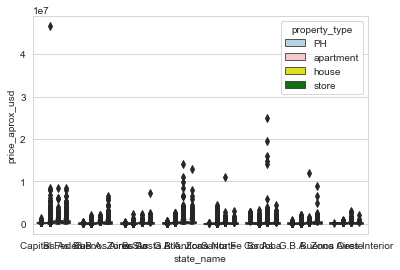

In [291]:
state_values = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Córdoba', 'Santa Fe', 'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior']

data_state_mask = data.state_name.apply(lambda x: x in state_values)

data_state = data.loc[data_state_mask, :]

palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]

sns.boxplot(x = "state_name", y = "price_aprox_usd", data=data_state, hue='property_type', palette = palette_suburb)

<AxesSubplot:ylabel='Unnamed: 0'>

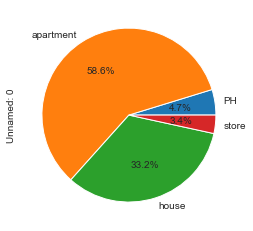

In [292]:
# label= ['PH', 'apartment', 'house', 'store']
sns.set_style("whitegrid")
operation_type.plot.pie(autopct="%.1f%%")


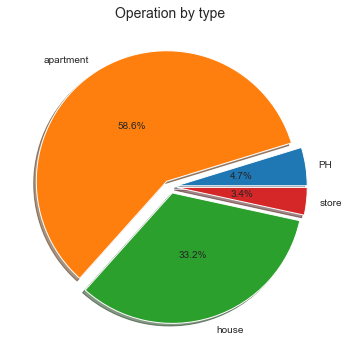

In [293]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
# labels = operation_type.keys()
label= ['PH', 'apartment', 'house', 'store']
plt.pie(x=operation_type, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, shadow=True)
plt.title("Operation by type", fontsize=14);
# pie.savefig("DeliveryPieChart.png")

In [294]:
data["pileta"] = data.description.str.contains(r'(?i)pileta|piscina|pisina')
data['pileta'].value_counts()

False    88426
True     32792
Name: pileta, dtype: int64

In [295]:
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,ambientes,ambientes2,pileta,priceClean,price_usd_per_m2_clean
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,2 AMBIENTES,2 AMB,False,62000.0,1127.272727
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,None,None,False,150000.0,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,2 AMBIENTES 3,2 AMB 3,False,72000.0,1309.090909
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,3 ambientes,None,False,95000.0,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,None,2 AMB,False,64000.0,1828.571429
